# Lesson 1a: Perceptron Learning

In this lesson you will implement one of the first algorithms from the history of neural networks: the perceptron.

You will NOT be using Keras/Tensorflow or other machine learning toolkits for this problem. Instead, you will implement the perceptron learning rule yourself.

Read over the code below. Much has already been done. Areas where you need to add your own code are marked with "TODO" comments.

In [99]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

In [100]:
# Import the 'iris' dataset.
iris = datasets.load_iris()
X = iris.data[:, :2]  # Use the first two features.
y = iris.target
x_min = min(X[:, 0])
x_max = max(X[:, 0])

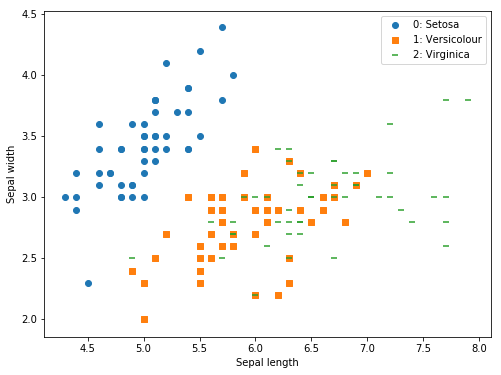

In [101]:
# Plot the data points.
def make_plot():
    plt.figure(figsize=(8, 6))
    markers = ['o', 's', '_']
    colors = 'tab:blue', 'tab:orange', 'tab:green'
    for i, cat in enumerate(np.unique(y)):
        plt.scatter(X[:, 0][y==cat], X[:, 1][y==cat], c=colors[i], marker=markers[i])
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.legend(['0: Setosa', '1: Versicolour', '2: Virginica'])
make_plot()

## Build a perceptron to distinguish Setosa from the other two varieties

Versicolour and Virginica are intermixed in this plot; note that some datapoints have identical (length, width) values but differente categories! Thus, we will focus on distinguishing Setosa from the other two, because perceptrons require data to be linearlly separable.

The perceptron will have a simple structure:
    
    * Two input nodes: one for Sepal length, one for Sepal width.
    * One output node: the output will be 0 for Setosa (category 0), and 1 for either of the other two categories.

In [102]:
class Perceptron():
    """Simple perceptron with 2 inputs and 1 output."""
    
    def __init__(self):
        
        # Initialize the perceptron weights and the bias term.
        self._w = [0, 0]
        self._b = 0
        
        # Set the default learning rate
        self._learning_rate = 0.01
        
        # add an array to see the accuracy score over the training time
        self._acc_training  = []
    
    def predict(self, x, verbose=False):
        """x is the input weight vector. Output is the result of running the perceptron on this input.
        
        Implement the Perceptron rule that involves multiplying weights by input, adding in bias, using a threshold, etc.
        
        The returned output should be 1 or 0.
        
        Use the "verbose" flag to print debugging info if desired.
        """
        # TODO
        activation = np.dot(x,np.transpose(self._w)) + self._b
        prediction = 1.0 if activation > 0.0 else 0.0

        if (verbose):
            # Print computation results here if desired.
            pass
        
        # TODO
        return prediction
        
    def accuracy(self, x, y):
        """Compute the total % accuracy over a set of inputs x and corresponding outputs y."""
        correct = 0
        for i in range(len(x)):
            example_x = x[i]
            example_y = y[i]
            if self.predict(example_x) == example_y:
                correct += 1
            
        return float(correct)/len(x)
            
    def update_weights(self, x, target, learning_rate, verbose=False):
        """Update the perceptron's weights according to the perceptron learning rule.
        
        x is an input example, and target is the desired output.
        
        This function should modify self._b and self._w. It has no return value.
        
        Use the "verbose" flag to print debugging info if desired.
        """
        prediction = self.predict(x)
        
        # TODO
        update = (target - prediction)
        self._learning_rate = learning_rate
        self._b += self._learning_rate*update
        self._w += self._learning_rate*np.dot(update,x)
      

        
    def train(self, x, y, learning_rate, num_iterations, verbose=False):
        """Train the perceptron for the given number of iterations on the input data X with 
        corresponding target values y.
        
        Use the "verbose" flag to print debugging info if desired.
        """
        assert(len(x) == len(y))
        for i in range(num_iterations):
            print('Iter #%d' % i)
            for j in range(len(x)):
                example_x = x[j]
                example_y = y[j]

                # Train the perceptron on this input/output example pair (example_x, example_y).
                # This should update the perceptron's weights.
                
                # TODO
                self.update_weights(example_x,example_y, learning_rate)
                
                if verbose:
                    pass
                    # TODO
                    
            # Print some useful info during training.
            print('Weights:', self._w)
            print('Bias:', self._b)  
            acc = self.accuracy(x, y)
            self._acc_training.append(round((acc*100),2))
            print('Accuracy: %.3f%%' % (acc * 100))
            print()
            

## Set up dataset for training a Setosa/not-Setosa classifier

In [103]:
def get_shuffled_data(x, y):
    """Convenient function to shuffle data and outputs, to inject some randomness into training."""
    # Create shuffle pattern of indices.
    s = np.arange(x.shape[0])
    np.random.shuffle(s)
    
    # Apply suffle pattern to x and y.
    x_shuffled = x[s]
    y_shuffled = y[s]
    return x_shuffled, y_shuffled

In [104]:
# Map data labels to just two categories.
y_two_categories = np.array([0 if i==0 else 1 for i in y])

In [105]:
X_shuffled, y_shuffled = get_shuffled_data(X, y_two_categories)

## Train a perceptron on the shuffled data
Try to get as high an accuracy as possible.

In [108]:
p = Perceptron()
num_iterations = 10000
p.train(X_shuffled,y_shuffled,1, num_iterations) # learning rate of 1 and 10k iterations
# p.train(X_shuffled, y_shuffled, 0.01, num_iterations) # learning rate of 0.001
# TODO: Train.

Iter #0
Weights: [  6.3 -10.4]
Bias: -2.0
Accuracy: 99.333%

Iter #1
Weights: [  9.1 -14.8]
Bias: -3.0
Accuracy: 99.333%

Iter #2
Weights: [ 11.9 -19.2]
Bias: -4.0
Accuracy: 99.333%

Iter #3
Weights: [ 10.  -25.6]
Bias: -6.0
Accuracy: 34.000%

Iter #4
Weights: [ 17.  -27.6]
Bias: -6.0
Accuracy: 99.333%

Iter #5
Weights: [ 18.4 -30.4]
Bias: -7.0
Accuracy: 99.333%

Iter #6
Weights: [ 15.3 -33.2]
Bias: -8.0
Accuracy: 45.333%

Iter #7
Weights: [ 22.5 -37.2]
Bias: -8.0
Accuracy: 99.333%

Iter #8
Weights: [ 23.9 -39.4]
Bias: -9.0
Accuracy: 99.333%

Iter #9
Weights: [ 25.3 -41.6]
Bias: -10.0
Accuracy: 99.333%

Iter #10
Weights: [ 26.7 -43.8]
Bias: -11.0
Accuracy: 99.333%

Iter #11
Weights: [ 26.3 -45.9]
Bias: -12.0
Accuracy: 94.667%

Iter #12
Weights: [ 29.2 -46. ]
Bias: -12.0
Accuracy: 99.333%

Iter #13
Weights: [ 25.6 -48.6]
Bias: -13.0
Accuracy: 77.333%

Iter #14
Weights: [ 30.3 -47.5]
Bias: -13.0
Accuracy: 99.333%

Iter #15
Weights: [ 31.2 -46.8]
Bias: -13.0
Accuracy: 98.667%

Iter #16
We

Weights: [ 51.1 -71.5]
Bias: -47.0
Accuracy: 99.333%

Iter #157
Weights: [ 52.  -70.8]
Bias: -47.0
Accuracy: 98.667%

Iter #158
Weights: [ 48.1 -74.1]
Bias: -48.0
Accuracy: 96.000%

Iter #159
Weights: [ 49.6 -73.4]
Bias: -48.0
Accuracy: 98.667%

Iter #160
Weights: [ 50.5 -72.7]
Bias: -48.0
Accuracy: 99.333%

Iter #161
Weights: [ 51.4 -72. ]
Bias: -48.0
Accuracy: 99.333%

Iter #162
Weights: [ 52.3 -71.3]
Bias: -48.0
Accuracy: 99.333%

Iter #163
Weights: [ 48.3 -73.6]
Bias: -49.0
Accuracy: 98.667%

Iter #164
Weights: [ 48.7 -74.3]
Bias: -49.0
Accuracy: 98.667%

Iter #165
Weights: [ 49.1 -75. ]
Bias: -49.0
Accuracy: 98.667%

Iter #166
Weights: [ 49.5 -75.7]
Bias: -49.0
Accuracy: 98.667%

Iter #167
Weights: [ 49.9 -76.4]
Bias: -49.0
Accuracy: 98.667%

Iter #168
Weights: [ 50.3 -77.1]
Bias: -49.0
Accuracy: 98.000%

Iter #169
Weights: [ 52.4 -76. ]
Bias: -49.0
Accuracy: 99.333%

Iter #170
Weights: [ 53.3 -75.3]
Bias: -49.0
Accuracy: 99.333%

Iter #171
Weights: [ 54.2 -74.6]
Bias: -49.0
Accur

Weights: [ 61.3 -78.5]
Bias: -67.0
Accuracy: 98.667%

Iter #290
Weights: [ 61.7 -78.5]
Bias: -67.0
Accuracy: 98.667%

Iter #291
Weights: [ 57.2 -82. ]
Bias: -68.0
Accuracy: 98.000%

Iter #292
Weights: [ 58.1 -81.3]
Bias: -68.0
Accuracy: 99.333%

Iter #293
Weights: [ 59.  -80.6]
Bias: -68.0
Accuracy: 99.333%

Iter #294
Weights: [ 59.9 -79.9]
Bias: -68.0
Accuracy: 99.333%

Iter #295
Weights: [ 60.8 -79.2]
Bias: -68.0
Accuracy: 99.333%

Iter #296
Weights: [ 61.7 -78.5]
Bias: -68.0
Accuracy: 98.667%

Iter #297
Weights: [ 57.2 -82. ]
Bias: -69.0
Accuracy: 98.667%

Iter #298
Weights: [ 57.7 -82.5]
Bias: -69.0
Accuracy: 98.000%

Iter #299
Weights: [ 58.6 -81.8]
Bias: -69.0
Accuracy: 99.333%

Iter #300
Weights: [ 59.5 -81.1]
Bias: -69.0
Accuracy: 99.333%

Iter #301
Weights: [ 60.4 -80.4]
Bias: -69.0
Accuracy: 99.333%

Iter #302
Weights: [ 61.3 -79.7]
Bias: -69.0
Accuracy: 99.333%

Iter #303
Weights: [ 62.2 -79. ]
Bias: -69.0
Accuracy: 98.667%

Iter #304
Weights: [ 57.7 -82.5]
Bias: -70.0
Accur

Weights: [ 63.8 -87. ]
Bias: -87.0
Accuracy: 98.667%

Iter #420
Weights: [ 64.7 -86.3]
Bias: -87.0
Accuracy: 99.333%

Iter #421
Weights: [ 65.6 -85.6]
Bias: -87.0
Accuracy: 99.333%

Iter #422
Weights: [ 66.5 -84.9]
Bias: -87.0
Accuracy: 99.333%

Iter #423
Weights: [ 67.4 -84.2]
Bias: -87.0
Accuracy: 99.333%

Iter #424
Weights: [ 68.3 -83.5]
Bias: -87.0
Accuracy: 98.667%

Iter #425
Weights: [ 63.8 -87. ]
Bias: -88.0
Accuracy: 98.667%

Iter #426
Weights: [ 64.3 -87.5]
Bias: -88.0
Accuracy: 98.667%

Iter #427
Weights: [ 65.2 -86.8]
Bias: -88.0
Accuracy: 99.333%

Iter #428
Weights: [ 66.1 -86.1]
Bias: -88.0
Accuracy: 99.333%

Iter #429
Weights: [ 67.  -85.4]
Bias: -88.0
Accuracy: 99.333%

Iter #430
Weights: [ 67.9 -84.7]
Bias: -88.0
Accuracy: 99.333%

Iter #431
Weights: [ 68.8 -84. ]
Bias: -88.0
Accuracy: 98.667%

Iter #432
Weights: [ 64.3 -87.5]
Bias: -89.0
Accuracy: 98.667%

Iter #433
Weights: [ 64.8 -88. ]
Bias: -89.0
Accuracy: 98.667%

Iter #434
Weights: [ 65.7 -87.3]
Bias: -89.0
Accur

Weights: [ 73.2 -94. ]
Bias: -107.0
Accuracy: 99.333%

Iter #580
Weights: [ 74.1 -93.3]
Bias: -107.0
Accuracy: 99.333%

Iter #581
Weights: [ 75.  -92.6]
Bias: -107.0
Accuracy: 99.333%

Iter #582
Weights: [ 75.9 -91.9]
Bias: -107.0
Accuracy: 99.333%

Iter #583
Weights: [ 76.8 -91.2]
Bias: -107.0
Accuracy: 98.667%

Iter #584
Weights: [ 77.2 -91.2]
Bias: -107.0
Accuracy: 98.667%

Iter #585
Weights: [ 73.1 -93.5]
Bias: -108.0
Accuracy: 99.333%

Iter #586
Weights: [ 74.  -92.8]
Bias: -108.0
Accuracy: 99.333%

Iter #587
Weights: [ 74.9 -92.1]
Bias: -108.0
Accuracy: 99.333%

Iter #588
Weights: [ 75.8 -91.4]
Bias: -108.0
Accuracy: 99.333%

Iter #589
Weights: [ 76.7 -90.7]
Bias: -108.0
Accuracy: 98.667%

Iter #590
Weights: [ 77.1 -90.7]
Bias: -108.0
Accuracy: 98.667%

Iter #591
Weights: [ 72.1 -94.1]
Bias: -109.0
Accuracy: 99.333%

Iter #592
Weights: [ 72.1 -94.5]
Bias: -109.0
Accuracy: 99.333%

Iter #593
Weights: [ 77.5 -91.5]
Bias: -108.0
Accuracy: 98.667%

Iter #594
Weights: [ 72.5 -94.9]
Bi

Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #706
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #707
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #708
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #709
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #710
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #711
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #712
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #713
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #714
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #715
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #716
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #717
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #718
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #719
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #720
Weights: [

Accuracy: 100.000%

Iter #845
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #846
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #847
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #848
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #849
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #850
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #851
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #852
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #853
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #854
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #855
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #856
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #857
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #858
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #859
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 

Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #990
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #991
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #992
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #993
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #994
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #995
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #996
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #997
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #998
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #999
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1000
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1001
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1002
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1003
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1004
Weigh

Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1121
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1122
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1123
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1124
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1125
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1126
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1127
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1128
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1129
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1130
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1131
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1132
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1133
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1134
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #

Accuracy: 100.000%

Iter #1250
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1251
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1252
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1253
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1254
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1255
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1256
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1257
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1258
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1259
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1260
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1261
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1262
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1263
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1264
Weights: [ 75.3 -96.5]
Bias: -1

Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1395
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1396
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1397
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1398
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1399
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1400
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1401
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1402
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1403
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1404
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1405
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1406
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1407
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1408
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #

Accuracy: 100.000%

Iter #1532
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1533
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1534
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1535
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1536
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1537
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1538
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1539
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1540
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1541
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1542
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1543
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1544
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1545
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1546
Weights: [ 75.3 -96.5]
Bias: -1

Iter #1685
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1686
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1687
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1688
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1689
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1690
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1691
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1692
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1693
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1694
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1695
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1696
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1697
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1698
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1699
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.0

Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1820
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1821
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1822
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1823
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1824
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1825
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1826
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1827
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1828
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1829
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1830
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1831
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1832
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1833
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #

Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1949
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1950
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1951
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1952
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1953
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1954
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1955
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1956
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1957
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1958
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1959
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1960
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1961
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #1962
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #

Accuracy: 100.000%

Iter #2087
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2088
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2089
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2090
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2091
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2092
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2093
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2094
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2095
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2096
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2097
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2098
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2099
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2100
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2101
Weights: [ 75.3 -96.5]
Bias: -1

Accuracy: 100.000%

Iter #2217
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2218
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2219
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2220
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2221
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2222
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2223
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2224
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2225
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2226
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2227
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2228
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2229
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2230
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2231
Weights: [ 75.3 -96.5]
Bias: -1

Accuracy: 100.000%

Iter #2357
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2358
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2359
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2360
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2361
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2362
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2363
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2364
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2365
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2366
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2367
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2368
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2369
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2370
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2371
Weights: [ 75.3 -96.5]
Bias: -1

Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2493
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2494
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2495
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2496
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2497
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2498
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2499
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2500
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2501
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2502
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2503
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2504
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2505
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2506
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #

Accuracy: 100.000%

Iter #2617
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2618
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2619
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2620
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2621
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2622
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2623
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2624
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2625
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2626
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2627
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2628
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2629
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2630
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2631
Weights: [ 75.3 -96.5]
Bias: -1

Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2762
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2763
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2764
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2765
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2766
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2767
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2768
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2769
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2770
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2771
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2772
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2773
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2774
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2775
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #

Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2912
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2913
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2914
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2915
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2916
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2917
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2918
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2919
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2920
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2921
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2922
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2923
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2924
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #2925
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #

Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3068
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3069
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3070
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3071
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3072
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3073
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3074
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3075
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3076
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3077
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3078
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3079
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3080
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3081
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #

Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3217
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3218
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3219
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3220
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3221
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3222
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3223
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3224
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3225
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3226
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3227
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3228
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3229
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3230
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #

Accuracy: 100.000%

Iter #3356
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3357
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3358
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3359
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3360
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3361
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3362
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3363
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3364
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3365
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3366
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3367
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3368
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3369
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3370
Weights: [ 75.3 -96.5]
Bias: -1

Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3498
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3499
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3500
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3501
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3502
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3503
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3504
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3505
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3506
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3507
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3508
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3509
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3510
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3511
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #

Accuracy: 100.000%

Iter #3652
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3653
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3654
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3655
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3656
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3657
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3658
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3659
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3660
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3661
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3662
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3663
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3664
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3665
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3666
Weights: [ 75.3 -96.5]
Bias: -1

Accuracy: 100.000%

Iter #3801
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3802
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3803
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3804
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3805
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3806
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3807
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3808
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3809
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3810
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3811
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3812
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3813
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3814
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3815
Weights: [ 75.3 -96.5]
Bias: -1

Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3945
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3946
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3947
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3948
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3949
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3950
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3951
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3952
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3953
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3954
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3955
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3956
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3957
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #3958
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #

Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4080
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4081
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4082
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4083
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4084
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4085
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4086
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4087
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4088
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4089
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4090
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4091
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4092
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4093
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #

Accuracy: 100.000%

Iter #4229
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4230
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4231
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4232
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4233
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4234
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4235
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4236
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4237
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4238
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4239
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4240
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4241
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4242
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4243
Weights: [ 75.3 -96.5]
Bias: -1

Bias: -117.0
Accuracy: 100.000%

Iter #4367
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4368
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4369
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4370
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4371
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4372
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4373
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4374
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4375
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4376
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4377
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4378
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4379
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4380
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4381
Weights: [ 75.3 -9

Accuracy: 100.000%

Iter #4516
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4517
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4518
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4519
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4520
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4521
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4522
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4523
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4524
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4525
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4526
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4527
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4528
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4529
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4530
Weights: [ 75.3 -96.5]
Bias: -1

Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4664
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4665
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4666
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4667
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4668
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4669
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4670
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4671
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4672
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4673
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4674
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4675
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4676
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4677
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #

Bias: -117.0
Accuracy: 100.000%

Iter #4801
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4802
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4803
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4804
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4805
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4806
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4807
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4808
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4809
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4810
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4811
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4812
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4813
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4814
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4815
Weights: [ 75.3 -9

Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4937
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4938
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4939
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4940
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4941
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4942
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4943
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4944
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4945
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4946
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4947
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4948
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4949
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #4950
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #

Accuracy: 100.000%

Iter #5064
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5065
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5066
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5067
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5068
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5069
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5070
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5071
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5072
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5073
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5074
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5075
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5076
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5077
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5078
Weights: [ 75.3 -96.5]
Bias: -1

Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5189
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5190
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5191
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5192
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5193
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5194
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5195
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5196
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5197
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5198
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5199
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5200
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5201
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5202
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #

Accuracy: 100.000%

Iter #5324
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5325
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5326
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5327
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5328
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5329
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5330
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5331
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5332
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5333
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5334
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5335
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5336
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5337
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5338
Weights: [ 75.3 -96.5]
Bias: -1

Accuracy: 100.000%

Iter #5449
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5450
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5451
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5452
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5453
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5454
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5455
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5456
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5457
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5458
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5459
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5460
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5461
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5462
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5463
Weights: [ 75.3 -96.5]
Bias: -1

Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5584
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5585
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5586
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5587
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5588
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5589
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5590
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5591
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5592
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5593
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5594
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5595
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5596
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5597
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #

Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5718
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5719
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5720
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5721
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5722
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5723
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5724
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5725
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5726
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5727
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5728
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5729
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5730
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5731
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #

Accuracy: 100.000%

Iter #5876
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5877
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5878
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5879
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5880
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5881
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5882
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5883
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5884
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5885
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5886
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5887
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5888
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5889
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #5890
Weights: [ 75.3 -96.5]
Bias: -1

Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6020
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6021
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6022
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6023
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6024
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6025
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6026
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6027
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6028
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6029
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6030
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6031
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6032
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6033
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #

Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6170
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6171
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6172
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6173
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6174
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6175
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6176
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6177
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6178
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6179
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6180
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6181
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6182
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6183
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #

Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6318
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6319
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6320
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6321
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6322
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6323
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6324
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6325
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6326
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6327
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6328
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6329
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6330
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6331
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #

Accuracy: 100.000%

Iter #6446
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6447
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6448
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6449
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6450
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6451
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6452
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6453
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6454
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6455
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6456
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6457
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6458
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6459
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6460
Weights: [ 75.3 -96.5]
Bias: -1

Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6589
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6590
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6591
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6592
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6593
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6594
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6595
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6596
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6597
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6598
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6599
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6600
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6601
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6602
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #

Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6715
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6716
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6717
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6718
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6719
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6720
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6721
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6722
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6723
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6724
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6725
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6726
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6727
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6728
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #

Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6853
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6854
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6855
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6856
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6857
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6858
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6859
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6860
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6861
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6862
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6863
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6864
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6865
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6866
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #

Accuracy: 100.000%

Iter #6998
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #6999
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7000
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7001
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7002
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7003
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7004
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7005
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7006
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7007
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7008
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7009
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7010
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7011
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7012
Weights: [ 75.3 -96.5]
Bias: -1

Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7140
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7141
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7142
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7143
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7144
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7145
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7146
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7147
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7148
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7149
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7150
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7151
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7152
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7153
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #

Accuracy: 100.000%

Iter #7284
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7285
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7286
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7287
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7288
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7289
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7290
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7291
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7292
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7293
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7294
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7295
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7296
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7297
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7298
Weights: [ 75.3 -96.5]
Bias: -1

Accuracy: 100.000%

Iter #7443
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7444
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7445
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7446
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7447
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7448
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7449
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7450
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7451
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7452
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7453
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7454
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7455
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7456
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7457
Weights: [ 75.3 -96.5]
Bias: -1

Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7586
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7587
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7588
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7589
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7590
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7591
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7592
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7593
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7594
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7595
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7596
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7597
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7598
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7599
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #

Accuracy: 100.000%

Iter #7714
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7715
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7716
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7717
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7718
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7719
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7720
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7721
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7722
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7723
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7724
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7725
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7726
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7727
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7728
Weights: [ 75.3 -96.5]
Bias: -1

Accuracy: 100.000%

Iter #7851
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7852
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7853
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7854
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7855
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7856
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7857
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7858
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7859
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7860
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7861
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7862
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7863
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7864
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7865
Weights: [ 75.3 -96.5]
Bias: -1

Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7997
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7998
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #7999
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8000
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8001
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8002
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8003
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8004
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8005
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8006
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8007
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8008
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8009
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8010
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #

Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8126
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8127
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8128
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8129
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8130
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8131
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8132
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8133
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8134
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8135
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8136
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8137
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8138
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8139
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #

Accuracy: 100.000%

Iter #8284
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8285
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8286
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8287
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8288
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8289
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8290
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8291
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8292
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8293
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8294
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8295
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8296
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8297
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8298
Weights: [ 75.3 -96.5]
Bias: -1

Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8408
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8409
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8410
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8411
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8412
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8413
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8414
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8415
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8416
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8417
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8418
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8419
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8420
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8421
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #

Accuracy: 100.000%

Iter #8538
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8539
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8540
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8541
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8542
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8543
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8544
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8545
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8546
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8547
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8548
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8549
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8550
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8551
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8552
Weights: [ 75.3 -96.5]
Bias: -1

Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8668
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8669
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8670
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8671
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8672
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8673
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8674
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8675
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8676
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8677
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8678
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8679
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8680
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8681
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #

Accuracy: 100.000%

Iter #8808
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8809
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8810
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8811
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8812
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8813
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8814
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8815
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8816
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8817
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8818
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8819
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8820
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8821
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8822
Weights: [ 75.3 -96.5]
Bias: -1

Accuracy: 100.000%

Iter #8954
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8955
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8956
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8957
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8958
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8959
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8960
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8961
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8962
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8963
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8964
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8965
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8966
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8967
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #8968
Weights: [ 75.3 -96.5]
Bias: -1

Accuracy: 100.000%

Iter #9088
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9089
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9090
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9091
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9092
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9093
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9094
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9095
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9096
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9097
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9098
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9099
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9100
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9101
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9102
Weights: [ 75.3 -96.5]
Bias: -1

Accuracy: 100.000%

Iter #9228
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9229
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9230
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9231
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9232
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9233
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9234
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9235
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9236
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9237
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9238
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9239
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9240
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9241
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9242
Weights: [ 75.3 -96.5]
Bias: -1

Accuracy: 100.000%

Iter #9365
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9366
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9367
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9368
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9369
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9370
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9371
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9372
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9373
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9374
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9375
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9376
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9377
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9378
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9379
Weights: [ 75.3 -96.5]
Bias: -1

Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9498
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9499
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9500
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9501
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9502
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9503
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9504
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9505
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9506
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9507
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9508
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9509
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9510
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9511
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #

Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9637
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9638
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9639
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9640
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9641
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9642
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9643
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9644
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9645
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9646
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9647
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9648
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9649
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9650
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #

Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9784
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9785
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9786
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9787
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9788
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9789
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9790
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9791
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9792
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9793
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9794
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9795
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9796
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9797
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #

Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9908
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9909
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9910
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9911
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9912
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9913
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9914
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9915
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9916
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9917
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9918
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9919
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9920
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #9921
Weights: [ 75.3 -96.5]
Bias: -117.0
Accuracy: 100.000%

Iter #

Text(0.5,1,'Training Accuracy as the Function of Number of Iterations')

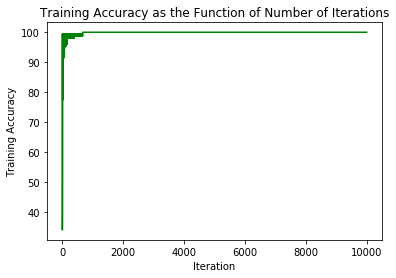

In [109]:
# plot the training accuracy as the function of iterations
iterations = range(1,num_iterations+1)
plt.plot(iterations, p._acc_training,'g')
plt.xlabel('Iteration')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy as the Function of Number of Iterations')

## Plot the learned perceptron decision boundary

Our perceptron makes decisions based on the value of b + w1x1 + w2x2. We can set this to 0 and solve to find the decision boundary. 

Complete the function below to compute x2 (the y axis in the plot above) as a function of b, w1, x1, w2 for a given perceptron:  
x2 = (-b - w1x1) / w2

In [110]:
def get_y_decision_boundary(x1, perceptron):
    x2 = (-perceptron._b - perceptron._w[0]*x1)/perceptron._w[1]    
    return x2

### Compute the decision boundary for the perceptron trained above, and plot it.

In [111]:
y1 = get_y_decision_boundary(x_min, p)
y2 = get_y_decision_boundary(x_max, p)
y1, y2

(2.1429015544042236, 4.95202072538876)

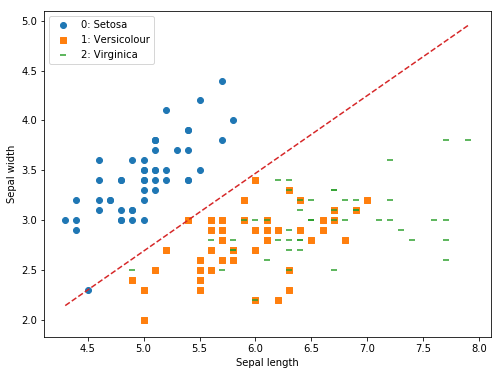

In [112]:
make_plot()
plt.plot([x_min,x_max], [y1,y2], ls='dashed', c='tab:red')

## Another model: Virginica/not-Virginica classifier

Build a new model, but grouping categories 0 and 1 together, trying to separate out Virginica from the other two classes.

In [113]:
y_two_categories_2 = np.array([0 if i==2 else 1 for i in y])

In [114]:
X_shuffled, y_shuffled = get_shuffled_data(X, y_two_categories_2)
p2 = Perceptron()

# Train the perceptron

# TODO
p2.train(X_shuffled, y_shuffled, 1,10000) # learning rate of 1

Iter #0
Weights: [-3.  10.6]
Bias: 4.0
Accuracy: 66.667%

Iter #1
Weights: [-7.4 20.1]
Bias: 7.0
Accuracy: 66.667%

Iter #2
Weights: [-7.9 27.2]
Bias: 10.0
Accuracy: 66.667%

Iter #3
Weights: [-9.1 29.2]
Bias: 13.0
Accuracy: 66.667%

Iter #4
Weights: [-13.7  30.6]
Bias: 15.0
Accuracy: 68.000%

Iter #5
Weights: [-16.3  30.2]
Bias: 17.0
Accuracy: 72.667%

Iter #6
Weights: [-17.   31.4]
Bias: 19.0
Accuracy: 74.000%

Iter #7
Weights: [-18.   32.5]
Bias: 21.0
Accuracy: 72.000%

Iter #8
Weights: [-19.   32.7]
Bias: 23.0
Accuracy: 72.000%

Iter #9
Weights: [-18.2  32.1]
Bias: 25.0
Accuracy: 73.333%

Iter #10
Weights: [-19.4  33.7]
Bias: 27.0
Accuracy: 73.333%

Iter #11
Weights: [-20.7  34.8]
Bias: 29.0
Accuracy: 74.667%

Iter #12
Weights: [-18.3  37. ]
Bias: 31.0
Accuracy: 68.000%

Iter #13
Weights: [-18.4  37. ]
Bias: 33.0
Accuracy: 68.000%

Iter #14
Weights: [-21.3  34.3]
Bias: 34.0
Accuracy: 74.667%

Iter #15
Weights: [-18.9  36.5]
Bias: 36.0
Accuracy: 68.667%

Iter #16
Weights: [-19.   36

Bias: 145.0
Accuracy: 78.000%

Iter #146
Weights: [-30.8  14.8]
Bias: 146.0
Accuracy: 80.000%

Iter #147
Weights: [-30.8  14.6]
Bias: 146.0
Accuracy: 80.000%

Iter #148
Weights: [-30.8  14.4]
Bias: 146.0
Accuracy: 79.333%

Iter #149
Weights: [-30.8  14.2]
Bias: 146.0
Accuracy: 78.667%

Iter #150
Weights: [-27.6  16. ]
Bias: 147.0
Accuracy: 74.000%

Iter #151
Weights: [-30.6  14.2]
Bias: 147.0
Accuracy: 81.333%

Iter #152
Weights: [-30.5  13.4]
Bias: 147.0
Accuracy: 79.333%

Iter #153
Weights: [-30.5  13.2]
Bias: 147.0
Accuracy: 79.333%

Iter #154
Weights: [-27.3  15. ]
Bias: 148.0
Accuracy: 74.000%

Iter #155
Weights: [-27.6  16.2]
Bias: 149.0
Accuracy: 72.667%

Iter #156
Weights: [-31.   13.8]
Bias: 149.0
Accuracy: 79.333%

Iter #157
Weights: [-31.   13.6]
Bias: 149.0
Accuracy: 79.333%

Iter #158
Weights: [-31.   13.4]
Bias: 149.0
Accuracy: 79.333%

Iter #159
Weights: [-30.5  13.3]
Bias: 149.0
Accuracy: 81.333%

Iter #160
Weights: [-30.4  12.5]
Bias: 149.0
Accuracy: 80.000%

Iter #161

Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #288
Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #289
Weights: [-30.7   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #290
Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #291
Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #292
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #293
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #294
Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #295
Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #296
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #297
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #298
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #299
Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #300
Weights: [-30.7   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #301
Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #302
Weights: [-31.1   2.4]
Bias: 176.0
Accur

Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #427
Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #428
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #429
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #430
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #431
Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #432
Weights: [-30.7   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #433
Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #434
Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #435
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #436
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #437
Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #438
Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #439
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #440
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #441
Weights: [-30.9   2.5]
Bias: 176.0
Accur

Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #574
Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #575
Weights: [-30.7   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #576
Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #577
Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #578
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #579
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #580
Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #581
Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #582
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #583
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #584
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #585
Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #586
Weights: [-30.7   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #587
Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #588
Weights: [-31.1   2.4]
Bias: 176.0
Accur

Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #705
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #706
Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #707
Weights: [-30.7   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #708
Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #709
Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #710
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #711
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #712
Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #713
Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #714
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #715
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #716
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #717
Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #718
Weights: [-30.7   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #719
Weights: [-31.3   2.4]
Bias: 176.0
Accur

Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #868
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #869
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #870
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #871
Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #872
Weights: [-30.7   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #873
Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #874
Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #875
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #876
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #877
Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #878
Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #879
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #880
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #881
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #882
Weights: [-30.8   2.6]
Bias: 176.0
Accur

Accuracy: 79.333%

Iter #1014
Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #1015
Weights: [-30.7   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #1016
Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #1017
Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #1018
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #1019
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #1020
Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #1021
Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #1022
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #1023
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #1024
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #1025
Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #1026
Weights: [-30.7   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #1027
Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #1028
Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #

Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #1149
Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #1150
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #1151
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #1152
Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #1153
Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #1154
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #1155
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #1156
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #1157
Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #1158
Weights: [-30.7   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #1159
Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #1160
Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #1161
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #1162
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #1163
Weights: [-30.7   2.6]
Bi

Accuracy: 79.333%

Iter #1306
Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #1307
Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #1308
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #1309
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #1310
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #1311
Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #1312
Weights: [-30.7   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #1313
Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #1314
Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #1315
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #1316
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #1317
Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #1318
Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #1319
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #1320
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #

Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #1440
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #1441
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #1442
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #1443
Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #1444
Weights: [-30.7   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #1445
Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #1446
Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #1447
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #1448
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #1449
Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #1450
Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #1451
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #1452
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #1453
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #1454
Weights: [-30.8   2.6]
Bi

Accuracy: 80.000%

Iter #1582
Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #1583
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #1584
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #1585
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #1586
Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #1587
Weights: [-30.7   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #1588
Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #1589
Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #1590
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #1591
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #1592
Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #1593
Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #1594
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #1595
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #1596
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #

Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #1733
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #1734
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #1735
Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #1736
Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #1737
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #1738
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #1739
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #1740
Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #1741
Weights: [-30.7   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #1742
Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #1743
Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #1744
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #1745
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #1746
Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #1747
Weights: [-30.6   2.7]
Bi

Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #1861
Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #1862
Weights: [-30.7   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #1863
Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #1864
Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #1865
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #1866
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #1867
Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #1868
Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #1869
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #1870
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #1871
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #1872
Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #1873
Weights: [-30.7   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #1874
Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #1875
Weights: [-31.1   2.4]
Bi

Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #2012
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #2013
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #2014
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #2015
Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #2016
Weights: [-30.7   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #2017
Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #2018
Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #2019
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #2020
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #2021
Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #2022
Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #2023
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #2024
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #2025
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #2026
Weights: [-30.8   2.6]
Bi

Accuracy: 79.333%

Iter #2151
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #2152
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #2153
Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #2154
Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #2155
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #2156
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #2157
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #2158
Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #2159
Weights: [-30.7   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #2160
Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #2161
Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #2162
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #2163
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #2164
Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #2165
Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #

Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #2282
Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #2283
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #2284
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #2285
Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #2286
Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #2287
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #2288
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #2289
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #2290
Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #2291
Weights: [-30.7   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #2292
Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #2293
Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #2294
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #2295
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #2296
Weights: [-30.7   2.6]
Bi

Accuracy: 79.333%

Iter #2422
Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #2423
Weights: [-30.7   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #2424
Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #2425
Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #2426
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #2427
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #2428
Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #2429
Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #2430
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #2431
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #2432
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #2433
Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #2434
Weights: [-30.7   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #2435
Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #2436
Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #

Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #2569
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #2570
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #2571
Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #2572
Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #2573
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #2574
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #2575
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #2576
Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #2577
Weights: [-30.7   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #2578
Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #2579
Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #2580
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #2581
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #2582
Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #2583
Weights: [-30.6   2.7]
Bi

Bias: 176.0
Accuracy: 79.333%

Iter #2712
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #2713
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #2714
Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #2715
Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #2716
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #2717
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #2718
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #2719
Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #2720
Weights: [-30.7   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #2721
Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #2722
Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #2723
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #2724
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #2725
Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #2726
Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.

Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #2846
Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #2847
Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #2848
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #2849
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #2850
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #2851
Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #2852
Weights: [-30.7   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #2853
Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #2854
Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #2855
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #2856
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #2857
Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #2858
Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #2859
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #2860
Weights: [-31.    2.4]
Bi

Accuracy: 80.000%

Iter #2991
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #2992
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #2993
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #2994
Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #2995
Weights: [-30.7   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #2996
Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #2997
Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #2998
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #2999
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #3000
Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #3001
Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #3002
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #3003
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #3004
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #3005
Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #

Accuracy: 79.333%

Iter #3136
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #3137
Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #3138
Weights: [-30.7   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #3139
Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #3140
Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #3141
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #3142
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #3143
Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #3144
Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #3145
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #3146
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #3147
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #3148
Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #3149
Weights: [-30.7   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #3150
Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #

Accuracy: 80.000%

Iter #3265
Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #3266
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #3267
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #3268
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #3269
Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #3270
Weights: [-30.7   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #3271
Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #3272
Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #3273
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #3274
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #3275
Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #3276
Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #3277
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #3278
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #3279
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #

Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #3430
Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #3431
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #3432
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #3433
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #3434
Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #3435
Weights: [-30.7   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #3436
Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #3437
Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #3438
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #3439
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #3440
Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #3441
Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #3442
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #3443
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #3444
Weights: [-30.9   2.5]
Bi

Accuracy: 79.333%

Iter #3570
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #3571
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #3572
Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #3573
Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #3574
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #3575
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #3576
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #3577
Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #3578
Weights: [-30.7   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #3579
Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #3580
Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #3581
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #3582
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #3583
Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #3584
Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #

Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #3723
Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #3724
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #3725
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #3726
Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #3727
Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #3728
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #3729
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #3730
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #3731
Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #3732
Weights: [-30.7   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #3733
Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #3734
Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #3735
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #3736
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #3737
Weights: [-30.7   2.6]
Bi

Accuracy: 80.000%

Iter #3865
Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #3866
Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #3867
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #3868
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #3869
Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #3870
Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #3871
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #3872
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #3873
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #3874
Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #3875
Weights: [-30.7   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #3876
Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #3877
Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #3878
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #3879
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #

Accuracy: 78.667%

Iter #3993
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #3994
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #3995
Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #3996
Weights: [-30.7   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #3997
Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #3998
Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #3999
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #4000
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #4001
Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #4002
Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #4003
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #4004
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #4005
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #4006
Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #4007
Weights: [-30.7   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #

Weights: [-30.7   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #4129
Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #4130
Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #4131
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #4132
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #4133
Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #4134
Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #4135
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #4136
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #4137
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #4138
Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #4139
Weights: [-30.7   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #4140
Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #4141
Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #4142
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #4143
Weights: [-30.8   2.5]
Bi

Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #4267
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #4268
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #4269
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #4270
Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #4271
Weights: [-30.7   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #4272
Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #4273
Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #4274
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #4275
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #4276
Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #4277
Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #4278
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #4279
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #4280
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #4281
Weights: [-30.8   2.6]
Bi

Bias: 176.0
Accuracy: 80.000%

Iter #4420
Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #4421
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #4422
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #4423
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #4424
Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #4425
Weights: [-30.7   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #4426
Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #4427
Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #4428
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #4429
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #4430
Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #4431
Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #4432
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #4433
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #4434
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.

Accuracy: 79.333%

Iter #4551
Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #4552
Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #4553
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #4554
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #4555
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #4556
Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #4557
Weights: [-30.7   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #4558
Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #4559
Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #4560
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #4561
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #4562
Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #4563
Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #4564
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #4565
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #

Bias: 176.0
Accuracy: 80.000%

Iter #4700
Weights: [-30.7   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #4701
Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #4702
Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #4703
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #4704
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #4705
Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #4706
Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #4707
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #4708
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #4709
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #4710
Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #4711
Weights: [-30.7   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #4712
Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #4713
Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #4714
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.

Accuracy: 79.333%

Iter #4835
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #4836
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #4837
Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #4838
Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #4839
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #4840
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #4841
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #4842
Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #4843
Weights: [-30.7   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #4844
Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #4845
Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #4846
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #4847
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #4848
Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #4849
Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #

Accuracy: 80.000%

Iter #4971
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #4972
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #4973
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #4974
Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #4975
Weights: [-30.7   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #4976
Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #4977
Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #4978
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #4979
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #4980
Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #4981
Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #4982
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #4983
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #4984
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #4985
Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #

Accuracy: 80.000%

Iter #5108
Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #5109
Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #5110
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #5111
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #5112
Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #5113
Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #5114
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #5115
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #5116
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #5117
Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #5118
Weights: [-30.7   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #5119
Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #5120
Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #5121
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #5122
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #

Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #5237
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #5238
Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #5239
Weights: [-30.7   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #5240
Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #5241
Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #5242
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #5243
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #5244
Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #5245
Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #5246
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #5247
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #5248
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #5249
Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #5250
Weights: [-30.7   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #5251
Weights: [-31.3   2.4]
Bi

Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #5393
Weights: [-30.7   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #5394
Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #5395
Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #5396
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #5397
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #5398
Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #5399
Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #5400
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #5401
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #5402
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #5403
Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #5404
Weights: [-30.7   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #5405
Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #5406
Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #5407
Weights: [-30.9   2.4]
Bi

Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #5536
Weights: [-30.7   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #5537
Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #5538
Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #5539
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #5540
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #5541
Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #5542
Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #5543
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #5544
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #5545
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #5546
Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #5547
Weights: [-30.7   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #5548
Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #5549
Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #5550
Weights: [-30.9   2.4]
Bi

Accuracy: 78.667%

Iter #5670
Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #5671
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #5672
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #5673
Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #5674
Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #5675
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #5676
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #5677
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #5678
Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #5679
Weights: [-30.7   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #5680
Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #5681
Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #5682
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #5683
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #5684
Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #

Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #5814
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #5815
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #5816
Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #5817
Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #5818
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #5819
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #5820
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #5821
Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #5822
Weights: [-30.7   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #5823
Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #5824
Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #5825
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #5826
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #5827
Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #5828
Weights: [-30.6   2.7]
Bi

Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #5950
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #5951
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #5952
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #5953
Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #5954
Weights: [-30.7   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #5955
Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #5956
Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #5957
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #5958
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #5959
Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #5960
Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #5961
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #5962
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #5963
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #5964
Weights: [-30.8   2.6]
Bi

Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #6082
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #6083
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #6084
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #6085
Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #6086
Weights: [-30.7   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #6087
Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #6088
Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #6089
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #6090
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #6091
Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #6092
Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #6093
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #6094
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #6095
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #6096
Weights: [-30.8   2.6]
Bi

Accuracy: 79.333%

Iter #6223
Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #6224
Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #6225
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #6226
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #6227
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #6228
Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #6229
Weights: [-30.7   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #6230
Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #6231
Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #6232
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #6233
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #6234
Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #6235
Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #6236
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #6237
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #

Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #6371
Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #6372
Weights: [-30.7   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #6373
Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #6374
Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #6375
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #6376
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #6377
Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #6378
Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #6379
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #6380
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #6381
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #6382
Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #6383
Weights: [-30.7   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #6384
Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #6385
Weights: [-31.1   2.4]
Bi

Accuracy: 80.000%

Iter #6511
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #6512
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #6513
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #6514
Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #6515
Weights: [-30.7   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #6516
Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #6517
Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #6518
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #6519
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #6520
Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #6521
Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #6522
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #6523
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #6524
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #6525
Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #

Weights: [-30.7   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #6659
Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #6660
Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #6661
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #6662
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #6663
Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #6664
Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #6665
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #6666
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #6667
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #6668
Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #6669
Weights: [-30.7   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #6670
Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #6671
Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #6672
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #6673
Weights: [-30.8   2.5]
Bi

Accuracy: 79.333%

Iter #6815
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #6816
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #6817
Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #6818
Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #6819
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #6820
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #6821
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #6822
Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #6823
Weights: [-30.7   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #6824
Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #6825
Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #6826
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #6827
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #6828
Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #6829
Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #

Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #6947
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #6948
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #6949
Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #6950
Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #6951
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #6952
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #6953
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #6954
Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #6955
Weights: [-30.7   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #6956
Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #6957
Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #6958
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #6959
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #6960
Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #6961
Weights: [-30.6   2.7]
Bi

Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #7086
Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #7087
Weights: [-30.7   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #7088
Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #7089
Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #7090
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #7091
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #7092
Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #7093
Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #7094
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #7095
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #7096
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #7097
Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #7098
Weights: [-30.7   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #7099
Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #7100
Weights: [-31.1   2.4]
Bi

Weights: [-30.7   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #7253
Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #7254
Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #7255
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #7256
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #7257
Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #7258
Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #7259
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #7260
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #7261
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #7262
Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #7263
Weights: [-30.7   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #7264
Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #7265
Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #7266
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #7267
Weights: [-30.8   2.5]
Bi

Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #7392
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #7393
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #7394
Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #7395
Weights: [-30.7   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #7396
Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #7397
Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #7398
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #7399
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #7400
Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #7401
Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #7402
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #7403
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #7404
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #7405
Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #7406
Weights: [-30.7   2.7]
Bi

Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #7551
Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #7552
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #7553
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #7554
Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #7555
Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #7556
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #7557
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #7558
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #7559
Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #7560
Weights: [-30.7   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #7561
Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #7562
Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #7563
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #7564
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #7565
Weights: [-30.7   2.6]
Bi

Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #7699
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #7700
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #7701
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #7702
Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #7703
Weights: [-30.7   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #7704
Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #7705
Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #7706
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #7707
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #7708
Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #7709
Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #7710
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #7711
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #7712
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #7713
Weights: [-30.8   2.6]
Bi

Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #7843
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #7844
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #7845
Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #7846
Weights: [-30.7   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #7847
Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #7848
Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #7849
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #7850
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #7851
Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #7852
Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #7853
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #7854
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #7855
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #7856
Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #7857
Weights: [-30.7   2.7]
Bi

Accuracy: 79.333%

Iter #7993
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #7994
Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #7995
Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #7996
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #7997
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #7998
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #7999
Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #8000
Weights: [-30.7   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #8001
Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #8002
Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #8003
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #8004
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #8005
Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #8006
Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #8007
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #

Iter #8140
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #8141
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #8142
Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #8143
Weights: [-30.7   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #8144
Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #8145
Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #8146
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #8147
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #8148
Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #8149
Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #8150
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #8151
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #8152
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #8153
Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #8154
Weights: [-30.7   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #8155
Weights: [-31.

Bias: 176.0
Accuracy: 79.333%

Iter #8278
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #8279
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #8280
Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #8281
Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #8282
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #8283
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #8284
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #8285
Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #8286
Weights: [-30.7   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #8287
Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #8288
Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #8289
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #8290
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #8291
Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #8292
Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.

Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #8420
Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #8421
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #8422
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #8423
Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #8424
Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #8425
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #8426
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #8427
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #8428
Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #8429
Weights: [-30.7   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #8430
Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #8431
Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #8432
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #8433
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #8434
Weights: [-30.7   2.6]
Bi

Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #8567
Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #8568
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #8569
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #8570
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #8571
Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #8572
Weights: [-30.7   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #8573
Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #8574
Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #8575
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #8576
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #8577
Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #8578
Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #8579
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #8580
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #8581
Weights: [-30.9   2.5]
Bi

Accuracy: 79.333%

Iter #8729
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #8730
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #8731
Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #8732
Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #8733
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #8734
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #8735
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #8736
Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #8737
Weights: [-30.7   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #8738
Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #8739
Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #8740
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #8741
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #8742
Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #8743
Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #

Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #8871
Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #8872
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #8873
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #8874
Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #8875
Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #8876
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #8877
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #8878
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #8879
Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #8880
Weights: [-30.7   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #8881
Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #8882
Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #8883
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #8884
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #8885
Weights: [-30.7   2.6]
Bi

Accuracy: 79.333%

Iter #9026
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #9027
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #9028
Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #9029
Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #9030
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #9031
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #9032
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #9033
Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #9034
Weights: [-30.7   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #9035
Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #9036
Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #9037
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #9038
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #9039
Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #9040
Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #

Weights: [-30.7   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #9189
Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #9190
Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #9191
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #9192
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #9193
Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #9194
Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #9195
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #9196
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #9197
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #9198
Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #9199
Weights: [-30.7   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #9200
Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #9201
Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #9202
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #9203
Weights: [-30.8   2.5]
Bi

Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #9339
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #9340
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #9341
Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #9342
Weights: [-30.7   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #9343
Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #9344
Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #9345
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #9346
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #9347
Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #9348
Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #9349
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #9350
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #9351
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #9352
Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #9353
Weights: [-30.7   2.7]
Bi

Accuracy: 79.333%

Iter #9472
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #9473
Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #9474
Weights: [-30.7   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #9475
Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #9476
Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #9477
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #9478
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #9479
Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #9480
Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #9481
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #9482
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #9483
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #9484
Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #9485
Weights: [-30.7   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #9486
Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #

Iter #9624
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #9625
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #9626
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #9627
Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #9628
Weights: [-30.7   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #9629
Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #9630
Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #9631
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #9632
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #9633
Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #9634
Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #9635
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #9636
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #9637
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #9638
Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #9639
Weights: [-30.

Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #9775
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #9776
Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #9777
Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #9778
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #9779
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #9780
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #9781
Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #9782
Weights: [-30.7   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #9783
Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #9784
Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #9785
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #9786
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #9787
Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #9788
Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #9789
Weights: [-31.2   2.4]
Bi

Bias: 176.0
Accuracy: 79.333%

Iter #9918
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #9919
Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #9920
Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #9921
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #9922
Weights: [-31.    2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #9923
Weights: [-30.9   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #9924
Weights: [-30.8   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #9925
Weights: [-30.7   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #9926
Weights: [-31.3   2.4]
Bias: 176.0
Accuracy: 78.667%

Iter #9927
Weights: [-31.1   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #9928
Weights: [-30.9   2.4]
Bias: 176.0
Accuracy: 79.333%

Iter #9929
Weights: [-30.8   2.5]
Bias: 176.0
Accuracy: 79.333%

Iter #9930
Weights: [-30.7   2.6]
Bias: 176.0
Accuracy: 80.000%

Iter #9931
Weights: [-30.6   2.7]
Bias: 176.0
Accuracy: 80.000%

Iter #9932
Weights: [-31.2   2.4]
Bias: 176.0
Accuracy: 78.

# Calculate the decision boundary and plot it.

In [116]:
y1 = get_y_decision_boundary(x_min, p2)
y2 = get_y_decision_boundary(x_max, p2)

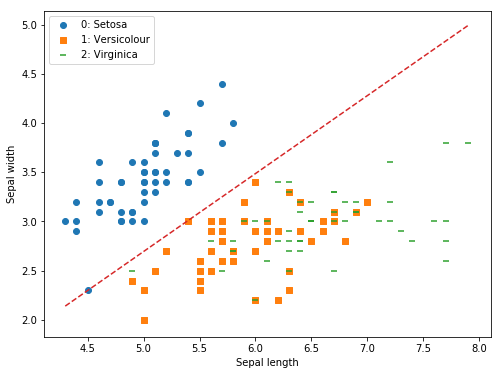

In [42]:
make_plot()
plt.plot([x_min,x_max], [y1,y2], ls='dashed', c='tab:red')

# Discuss the results in the cell below. How did the two perceptrons compare? 

Class 1 (Versicolor) and Class 2 (Virginica) are not linearly separable.  Therefore, we can't classify between class (0+1) and class 2 using a simple perceptron.  Perhaps we should transform the variable to make them more separable, like using kernel function in SVM or other techniques.